In [1]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [2]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [3]:
x_train_0 = x_full[y_full == 0][:]
x_train_8 = x_full[y_full == 8][:]
x_test_0 = x_test_full[y_test_full == 0][:]
x_test_8 = x_test_full[y_test_full == 8][:]

In [4]:
print(len(x_train_0),len(x_train_8))
print(len(x_test_0),len(x_test_8))

5923 5851
980 974


In [5]:
# Training Data
'''
TRAINING DATA
5851 - 0
5851 - 8 
    [5851 * 8]
'''

x_train_0 = x_full[y_full == 0][:5851]
y_train_0 = np.ones((5851,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_8 = x_full[y_full == 8][:5851]
y_train_8 = np.zeros((5851,))
print("shape_training_8 =>")
print("\t",x_train_8.shape)
print("\t",y_train_8.shape)

x_train = np.concatenate([x_train_0, x_train_8], axis=0)
y_train = np.concatenate([y_train_0, y_train_8], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5851, 28, 28)
	 (5851,)
shape_training_8 =>
	 (5851, 28, 28)
	 (5851,)
shape_training_complete =>
	 (11702, 28, 28)
	 (11702,)


In [6]:
# Testing Data
'''
TESTING DATA
974 - zeros
974 - 8 
    [974 * 8]
'''

x_test_0 = x_test_full[y_test_full == 0][:974]
y_test_0 = np.ones((974,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_8 = x_test_full[y_test_full == 8][:974]
y_test_8 = np.zeros((974,))
print("shape_testing_8 =>")
print("\t",x_test_8.shape)
print("\t",y_test_8.shape)

x_test = np.concatenate([x_test_0, x_test_8], axis=0)
y_test = np.concatenate([y_test_0, y_test_8], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (974, 28, 28)
	 (974,)
shape_testing_8 =>
	 (974, 28, 28)
	 (974,)
shape_testing_complete =>
	 (1948, 28, 28)
	 (1948,)


In [7]:
model_dense = models.Sequential()
model_dense.add(layers.Flatten(input_shape=(28, 28, 1)))
model_dense.add(layers.Dense(1, activation='sigmoid'))  
model_dense.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_dense.summary()


model_convDense = models.Sequential()
model_convDense.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model_convDense.add(layers.Flatten())
model_convDense.add(layers.Dense(1, activation='sigmoid'))  
model_convDense.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)
model_convDense.summary()


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
def load_model_weights(model, weight_dir):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model_dense, "../InitWeightsDense")
load_model_weights(model_convDense, "../InitWeightsConvDense")

No weights found for layer 0.
Loaded weights for layer 1 from ../InitWeightsDense\layer_number_1.npz
Loaded weights for layer 0 from ../InitWeightsConvDense\layer_number_0.npz
No weights found for layer 1.
Loaded weights for layer 2 from ../InitWeightsConvDense\layer_number_2.npz


In [10]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [11]:
save_dir_dense = "results/Zero_WeightsDense"
save_dir_convDense = "results/Zero_WeightsConvDense"
save_weights_callback_dense = SaveWeightsCallback(save_dir_dense)
save_weights_callback_convDense = SaveWeightsCallback(save_dir_convDense)

In [12]:
history_dense = model_dense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_dense]
)
history_convDense = model_convDense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_convDense]
)

Epoch 1/15
328/366 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8406 - loss: 13.4081Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch1\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8509 - loss: 12.3999
Epoch 2/15
332/366 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9807 - loss: 0.7384Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch2\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.9809 - loss: 0.7256
Epoch 3/15
331/366 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9885 - loss: 0.4121Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch3\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.9886 - loss: 0.4110
Epoch 4/15
346/366 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.2746Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch4\Layer_1.npz
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.2792
Epoch 5/15
336/366 ━━━━━━━━━━━

In [13]:
test_loss, test_acc = model_dense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

test_loss, test_acc = model_convDense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.9900 - loss: 0.3738    
Test accuracy: 0.9907597303390503
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0533
Test accuracy: 0.9907597303390503


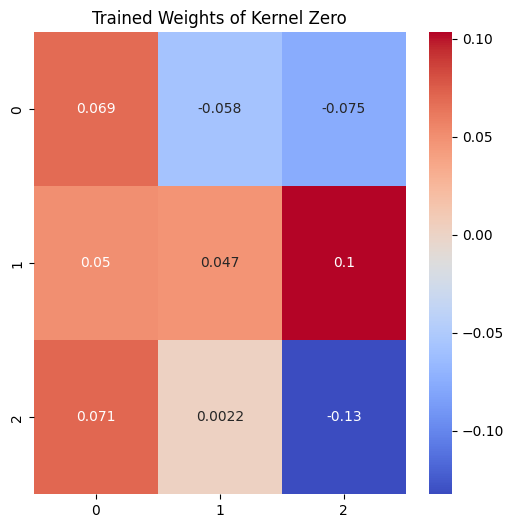

In [14]:
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()
final_kernel = model_convDense.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Trained Weights of Kernel Zero')

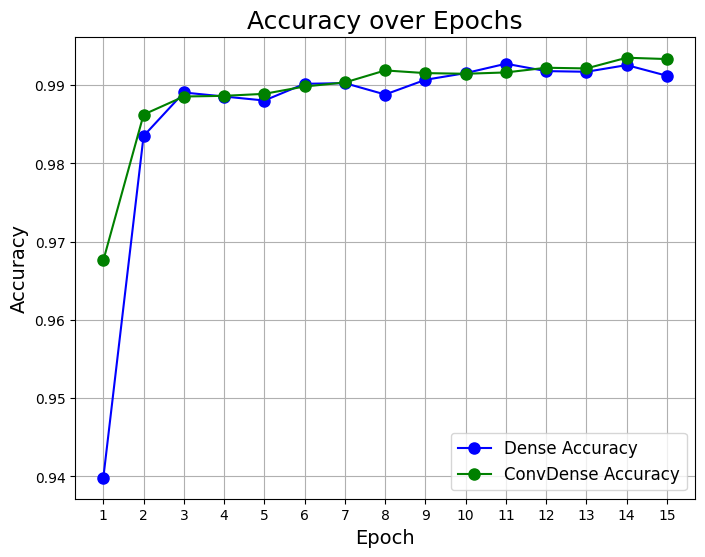

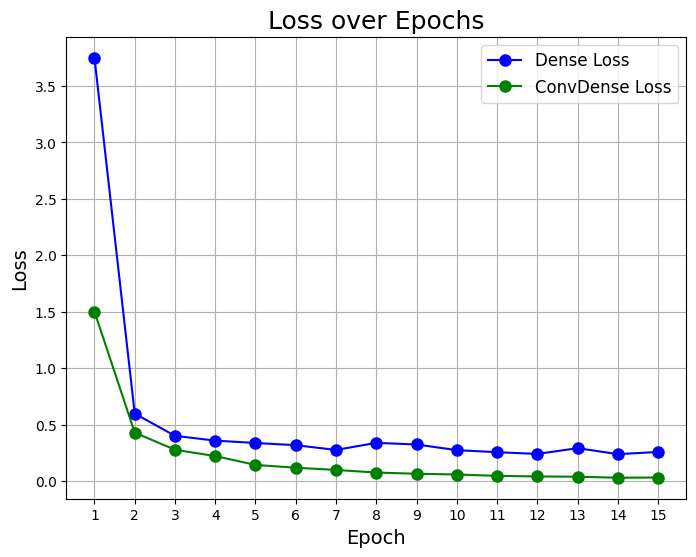

In [15]:
dense_history_dict = history_dense.history
conv_dense_history_dict = history_convDense.history
dense_accuracy = dense_history_dict['accuracy']
conv_dense_accuracy = conv_dense_history_dict['accuracy']
dense_loss = dense_history_dict['loss']
conv_dense_loss = conv_dense_history_dict['loss']

epochs = range(1, len(dense_accuracy) + 1)

# accuracy
plt.figure(figsize=(8, 6))  
plt.plot(epochs, dense_accuracy, 'bo-', label='Dense Accuracy', markersize=8)
plt.plot(epochs, conv_dense_accuracy, 'go-', label='ConvDense Accuracy', markersize=8)
plt.title('Accuracy over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_accuracy_plot.png", bbox_inches='tight', dpi=1000 )
plt.show()
plt.close()

# loss
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(epochs, dense_loss, 'bo-', label='Dense Loss', markersize=8)
plt.plot(epochs, conv_dense_loss, 'go-', label='ConvDense Loss', markersize=8)
plt.title('Loss over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_loss_plot.png", bbox_inches='tight', dpi=1000)
plt.show()
plt.close()
